### Practice 1 - Handling Missing Data / Feature Engineering / Encoding

In [36]:

## place the libraries here
import pandas as pd
import numpy as np

###  handlin missing  data
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
### encoding 

import seaborn as sns

In [37]:
##read the dataframe

df_tit = pd.read_csv('titanic.csv')

In [38]:
##basic exploration 

df_tit

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [39]:
df_tit.describe(include='all')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [40]:
df_tit.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [41]:
### 1 - Handling Missing Data

#MAR, MNAR, MACR

##1 Cabin -what's the best method?
## removal / imputation?

## Remove
df_tit_tr = df_tit.copy()
df_tit_tr.drop(['Cabin'], axis='columns', inplace= True)
df_tit_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [42]:
### 1 - Handling Missing Data

#MAR, MNAR, MCAR

## Imputation - Hot Deck - Hardcode 
df_tit_tr = df_tit.copy()
df_tit_tr['Cabin_Tr'] = df_tit_tr['Cabin'].fillna('NotDefined')

df_tit_tr.groupby('Cabin_Tr')['Fare'].sum()

Cabin_Tr
A10              40.1250
A14              52.0000
A16              39.6000
A19              26.0000
A20              56.9292
                 ...    
F38               7.7500
F4               78.0000
G6               54.3250
NotDefined    13161.0825
T                35.5000
Name: Fare, Length: 148, dtype: float64

In [43]:
### 1 - Handling Missing Data

#MAR, MNAR, MCAR

## Imputation - Hot Deck - SimpleImputer 
df_tit_tr = df_tit.copy()

imp = SimpleImputer(strategy='constant', fill_value='NotDefined')
df_tit_tr[['Cabin_Tr']] = imp.fit_transform(df_tit_tr[['Cabin']])


In [44]:
df_tit_tr.groupby('Cabin_Tr')['Fare'].sum()

Cabin_Tr
A10              40.1250
A14              52.0000
A16              39.6000
A19              26.0000
A20              56.9292
                 ...    
F38               7.7500
F4               78.0000
G6               54.3250
NotDefined    13161.0825
T                35.5000
Name: Fare, Length: 148, dtype: float64

In [45]:
df_tit_tr.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Tr
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3,148
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S,NotDefined
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644,687
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,NaN


In [46]:
df_tit_tr['Cabin'] = df_tit_tr['Cabin_Tr']
df_tit_tr.drop(['Cabin_Tr'], axis='columns',inplace=True)

In [47]:
df_tit_tr.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64

In [48]:
### 2 Age -what's the best method?
# removal / imputation 

df_tit_tr.describe()

### Mean/Mode?
imp = SimpleImputer(strategy='mean', missing_values=np.nan)
df_tit_tr[['Age_Tr']] = imp.fit_transform(df_tit_tr[['Age']])

df_tit_tr.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_Tr
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,29.699118
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,13.002015
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.420000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,22.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,29.699118
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,35.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,80.000000


In [49]:
df_tit_tr.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
Age_Tr           0
dtype: int64

In [50]:
### exploring imputation - based on a dependent variable 

###  	
df_tit_tr['Age_Tr_Gender'] = df_tit_tr['Age'].fillna(df_tit_tr.groupby('Sex')['Age'].transform('mean'))

df_tit_tr.describe()




,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_Tr,Age_Tr_Gender
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,29.699118,29.736034
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,13.002015,13.014897
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.420000,0.420000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,22.000000,22.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,29.699118,30.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,35.000000,35.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,80.000000,80.000000


In [51]:
### exploring imputation - based on a dependent variable 
###  	
df_tit_tr.groupby('Sex')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,261.0,27.915709,14.110146,0.75,18.0,27.0,37.0,63.0
male,453.0,30.726645,14.678201,0.42,21.0,29.0,39.0,80.0


In [52]:
### exploring imputation - based on a dependent variable 
###  	
df_tit_tr.groupby('Sex')['Age_Tr'].describe()


,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,314.0,28.216730,12.877543,0.75,21.0,29.699118,35.0,63.0
male,577.0,30.505824,13.009478,0.42,23.0,29.699118,35.0,80.0


In [53]:
### exploring imputation - based on a dependent variable 
###  	
df_tit_tr.groupby('Sex')['Age_Tr_Gender'].describe()


,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,314.0,27.915709,12.860150,0.75,21.0,27.915709,35.0,63.0
male,577.0,30.726645,13.002618,0.42,23.0,30.726645,35.0,80.0


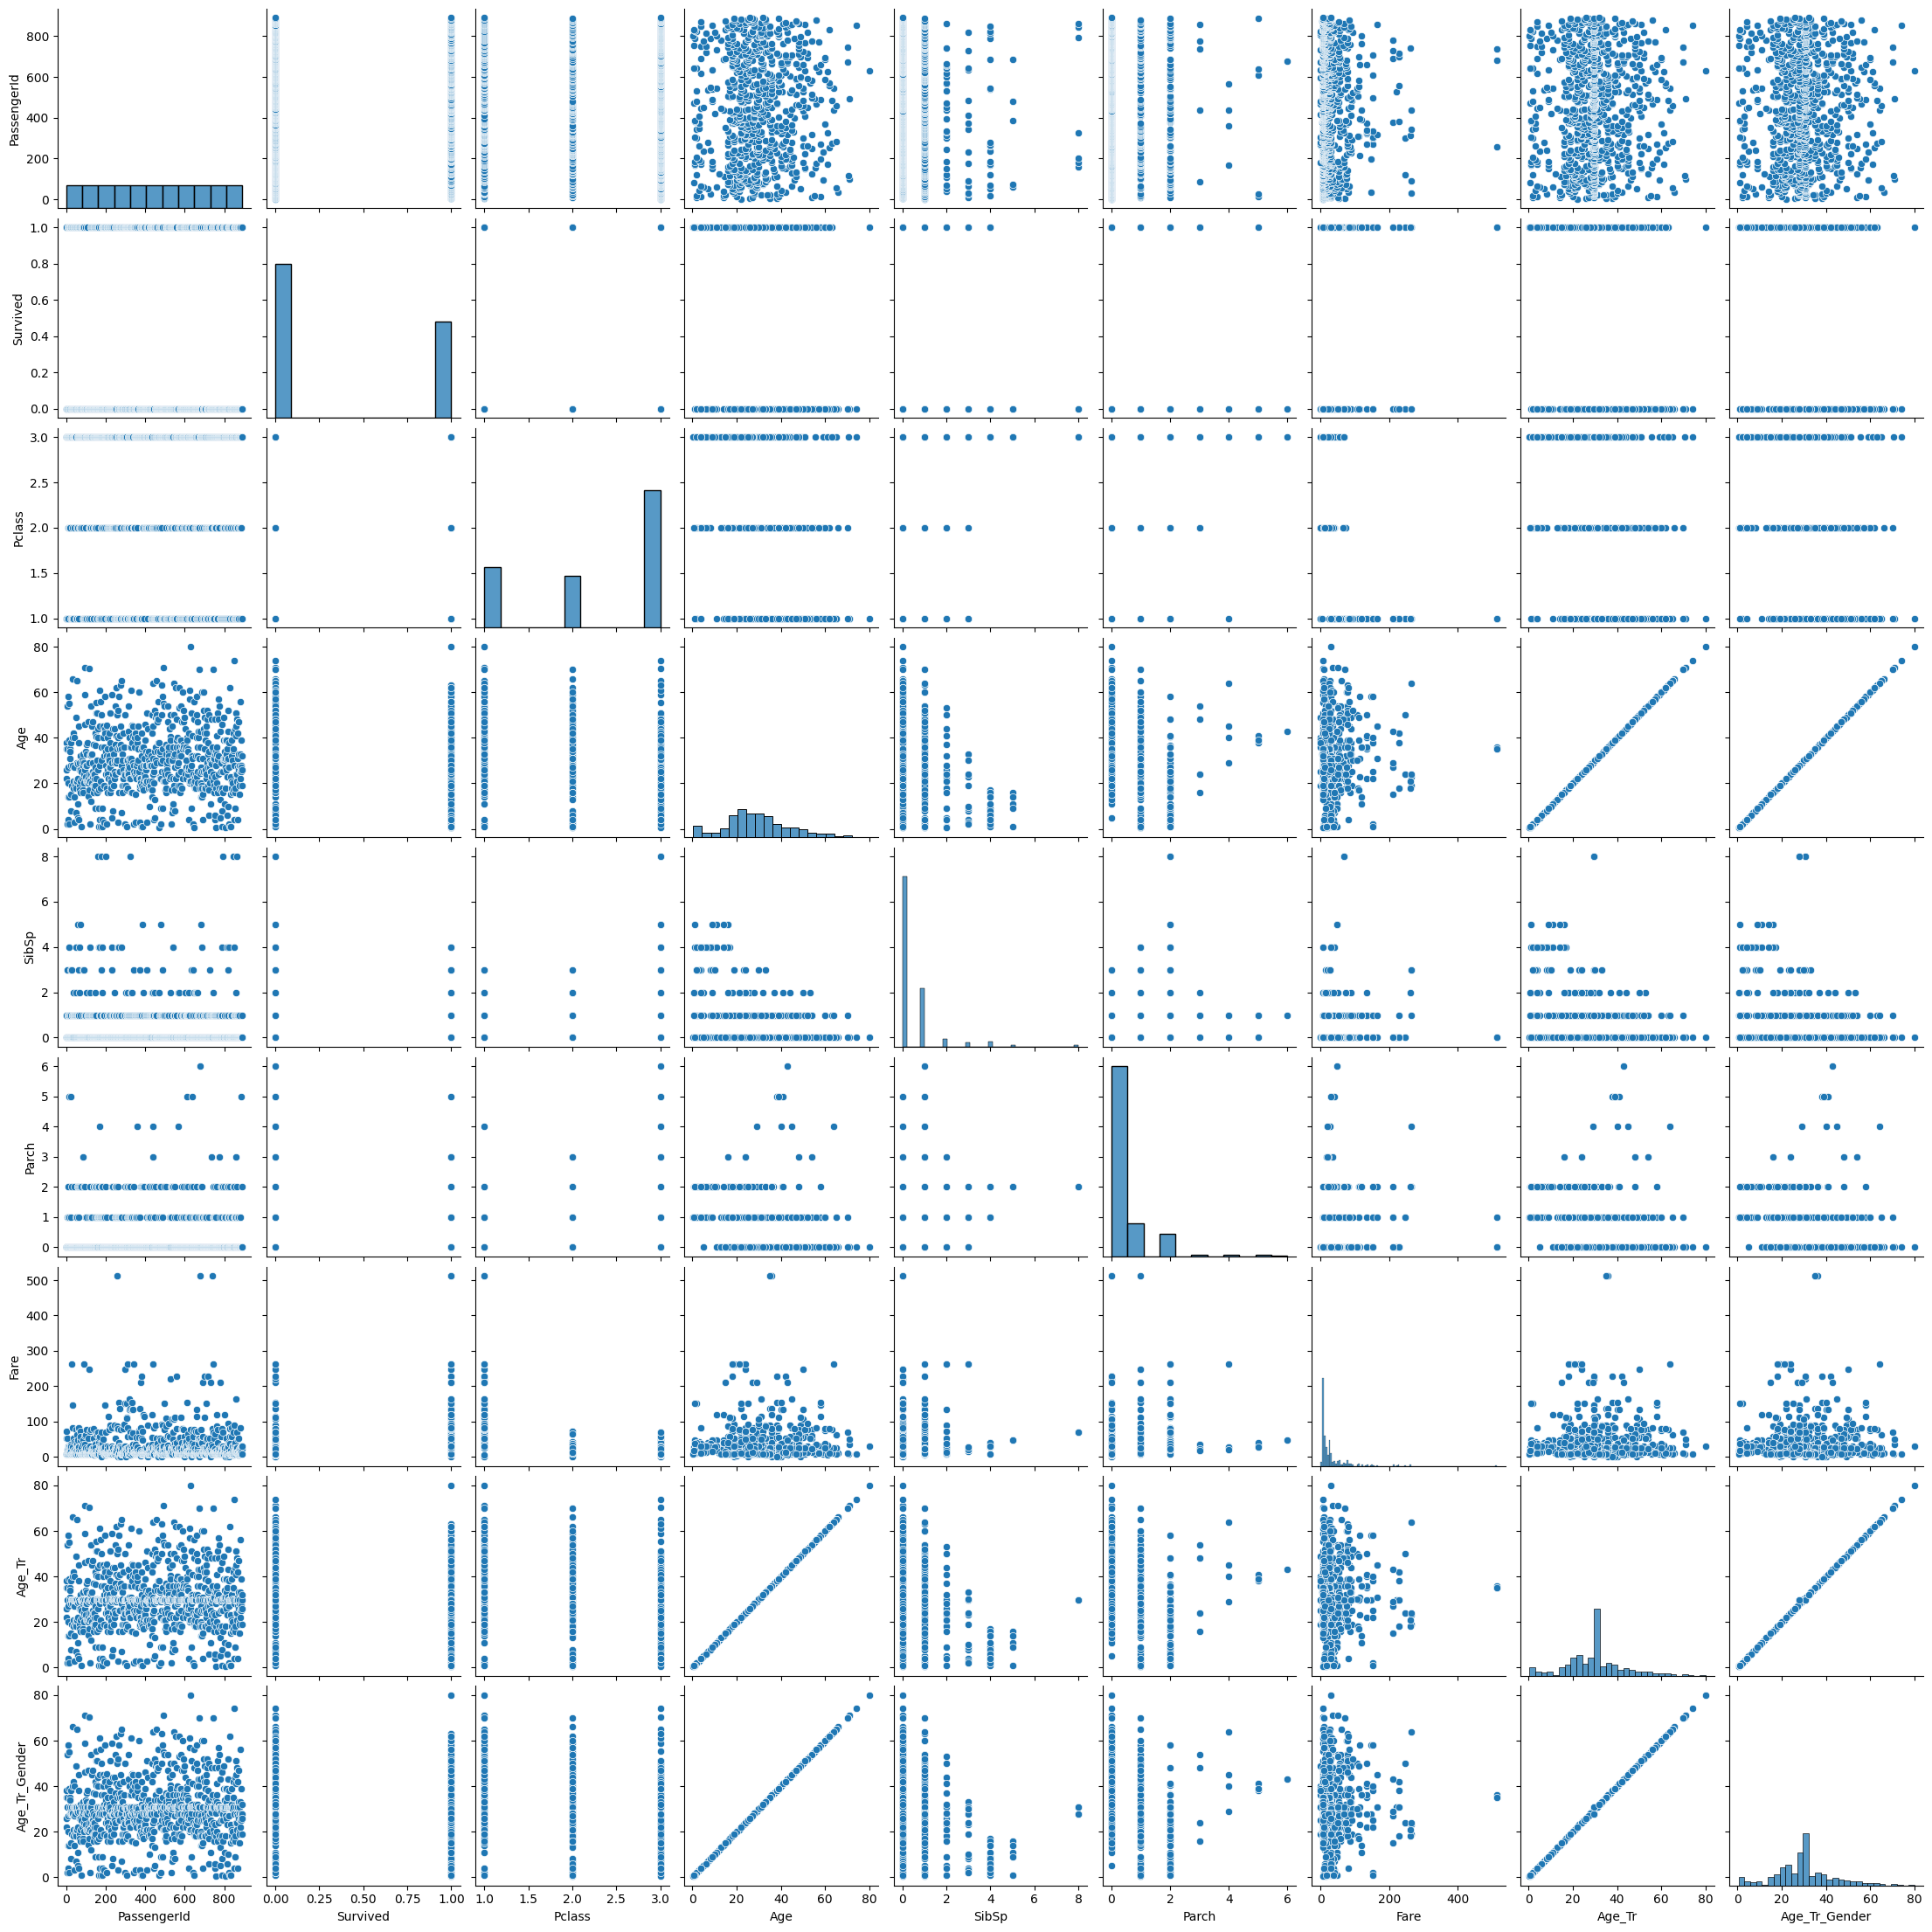

In [54]:
### exploring imputation - based on a dependent variable 
sns.pairplot(df_tit_tr)


In [55]:
df_tit_tr.groupby('SibSp')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
SibSp,,,,,,,,
0,471.0,31.397558,13.647767,0.42,22.00,29.0,39.00,80.0
1,183.0,30.089727,14.645033,0.67,20.00,30.0,39.00,70.0
2,25.0,22.620000,14.679230,0.75,16.00,23.0,28.00,53.0
3,12.0,13.916667,11.317391,2.00,3.75,9.5,23.25,33.0
4,18.0,7.055556,4.880601,1.00,3.25,6.5,9.00,17.0
5,5.0,10.200000,5.805170,1.00,9.00,11.0,14.00,16.0
8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
df_tit_tr.groupby('SibSp')['Age_Tr'].describe()

,count,mean,std,min,25%,50%,75%,max
SibSp,,,,,,,,
0,608.0,31.014851,1.203024e+01,0.420000,24.000000,29.699118,35.000000,80.000000
1,209.0,30.041134,1.369978e+01,0.670000,22.000000,29.699118,38.000000,70.000000
2,28.0,23.378477,1.401817e+01,0.750000,17.500000,24.000000,29.699118,53.000000
3,16.0,17.862279,1.198937e+01,2.000000,7.000000,21.000000,29.699118,33.000000
4,18.0,7.055556,4.880601e+00,1.000000,3.250000,6.500000,9.000000,17.000000
5,5.0,10.200000,5.805170e+00,1.000000,9.000000,11.000000,14.000000,16.000000
8,7.0,29.699118,3.837369e-15,29.699118,29.699118,29.699118,29.699118,29.699118


In [57]:
### KNN

#Impute Missing Values using KNN
imp = KNNImputer(n_neighbors=3)

###useful for "weighted" Age, according to some other numeric data - SibSP was selected as the Age average 
### is differente according to each SibSP value
df_KNN = pd.DataFrame(imp.fit_transform(df_tit_tr[['SibSp','Age']]))

### using the second column
df_tit_tr['Age_KNN'] =  df_KNN[1] 


In [58]:
### compare the difference 
df_tit_tr.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_Tr,Age_Tr_Gender,Age_KNN
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,29.699118,29.736034,30.825107
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,13.002015,13.014897,13.581686
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.420000,0.420000,0.420000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,22.000000,22.000000,22.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,29.699118,30.000000,31.666667
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,35.000000,35.000000,38.333333
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,80.000000,80.000000,80.000000


In [59]:
df_tit_tr.groupby('SibSp')['Age_KNN'].describe()

,count,mean,std,min,25%,50%,75%,max
SibSp,,,,,,,,
0,608.0,32.960389,12.354477,0.420000,24.000000,34.000000,38.333333,80.000000
1,209.0,30.285901,13.709104,0.670000,22.000000,31.666667,38.000000,70.000000
2,28.0,23.089286,13.908300,0.750000,17.500000,24.000000,27.250000,53.000000
3,16.0,12.854167,9.876248,2.000000,7.000000,9.666667,20.000000,33.000000
4,18.0,7.055556,4.880601,1.000000,3.250000,6.500000,9.000000,17.000000
5,5.0,10.200000,5.805170,1.000000,9.000000,11.000000,14.000000,16.000000
8,7.0,9.333333,0.000000,9.333333,9.333333,9.333333,9.333333,9.333333


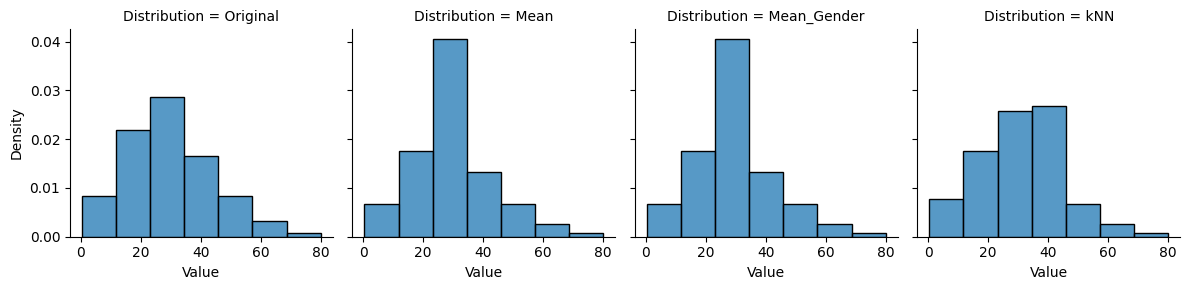

In [60]:
### visualising the method of imputation 
### preparing the histogram to compare

values = df_tit_tr['Age'].tolist()
names = list(['Original'] * len(df_tit_tr['Age']))

### Mean imputation
values.extend( df_tit_tr['Age_Tr'].tolist())
names.extend(list(['Mean'] * len(df_tit_tr['Age_Tr'])))

### Grouped Mean imputation -- this example I did here.. but we did similar thing togheter in EXCEL 
values.extend( df_tit_tr['Age_Tr_Gender'].tolist())
names.extend(list(['Mean_Gender'] * len(df_tit_tr['Age_Tr_Gender'])))

### KNN imputation
values.extend(df_tit_tr['Age_KNN'].tolist())
names.extend(list(['kNN'] * len(df_tit_tr['Age_KNN'])))

dist_data = pd.DataFrame({'Distribution': names, 'Value': values})

grid = sns.FacetGrid(dist_data, col='Distribution', col_wrap=4)
grid.map(sns.histplot, 'Value', bins = 7, stat='density')

<Axes: xlabel='variable', ylabel='value'>

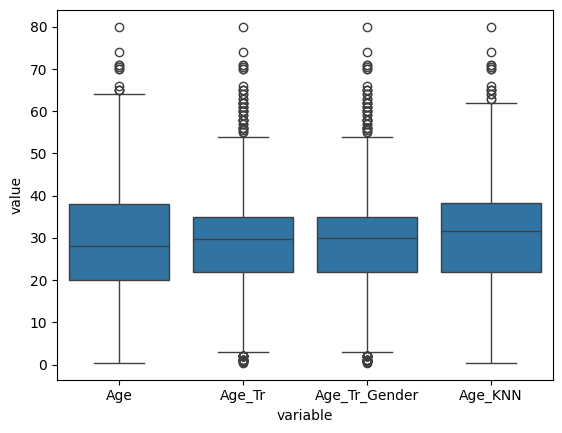

In [61]:
### visualising the method of imputation 

df_tit_tr_box = df_tit_tr[['Age','Age_Tr','Age_Tr_Gender','Age_KNN']]

sns.boxplot(x="variable", y="value", data=pd.melt(df_tit_tr_box))

In [74]:
### 3 - Embarked Treatment
df_tit_tr.isnull().sum()


PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age              177
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin              0
Embarked           2
Age_Tr             0
Age_Tr_Gender      0
Age_KNN            0
Embarked_Tr        0
dtype: int64

In [75]:
df_tit_tr[df_tit_tr['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Tr,Age_Tr_Gender,Age_KNN,Embarked_Tr
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,38.0,38.0,38.0,C
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,62.0,62.0,62.0,C


In [76]:
df_tit_tr[(df_tit_tr['Fare'] > 79) & (df_tit_tr['Fare'] < 82)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Tr,Age_Tr_Gender,Age_KNN,Embarked_Tr
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN,38.000000,38.000000,38.000000,C
139,140,0,1,"Giglio, Mr. Victor",male,24.0,0,0,PC 17593,79.2000,B86,C,24.000000,24.000000,24.000000,C
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,NaN,0,0,PC 17585,79.2000,NotDefined,C,29.699118,27.915709,38.333333,C
262,263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.6500,E67,S,52.000000,52.000000,52.000000,S
445,446,1,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S,4.000000,4.000000,4.000000,S
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.6500,E67,S,39.000000,39.000000,39.000000,S
585,586,1,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.6500,E68,S,18.000000,18.000000,18.000000,S
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.2000,B41,C,60.000000,60.000000,60.000000,C
789,790,0,1,"Guggenheim, Mr. Benjamin",male,46.0,0,0,PC 17593,79.2000,B82 B84,C,46.000000,46.000000,46.000000,C
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN,62.000000,62.000000,62.000000,C


In [77]:
df_tit_tr.groupby('Embarked') ['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Embarked,,,,,,,,
C,168.0,59.954144,83.912994,4.0125,13.69795,29.70,78.500025,512.3292
Q,77.0,13.276030,14.188047,6.7500,7.75000,7.75,15.500000,90.0000
S,644.0,27.079812,35.887993,0.0000,8.05000,13.00,27.900000,263.0000


In [78]:
imp = SimpleImputer(strategy='constant',fill_value="C")

df_tit_tr[['Embarked_Tr']] = imp.fit_transform(df_tit_tr[['Embarked']])

In [79]:
df_tit_tr.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age              177
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin              0
Embarked           2
Age_Tr             0
Age_Tr_Gender      0
Age_KNN            0
Embarked_Tr        0
dtype: int64

In [99]:

df_tit_cl = df_tit_tr.copy()

#### replacing the value by the treated after copying the dataframe to preserve the treated in the previous df_tit_tr - Ronan this is for you :)
df_tit_cl['Embarked'] = df_tit_cl['Embarked_Tr']
df_tit_cl['Age'] = df_tit_cl['Age_KNN']

df_tit_cl = df_tit_cl.iloc[:,:-3].copy()



In [100]:
df_tit_cl.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Age_Tr         0
dtype: int64

In [101]:
### Feature Engineering - Adding extra columns to enhance the analysis
df_tit_cl['Critical_Age'] = ((df_tit_cl['Age'] < 10) |  (df_tit_cl['Age'] > 80))

df_tit_cl.groupby('Critical_Age').describe()

PassengerId                                                     \
                   count        mean         std  min    25%    50%     75%   
Critical_Age                                                                  
False              818.0  447.893643  255.738439  1.0  229.5  450.5  667.75   
True                73.0  424.780822  275.787572  8.0  183.0  387.0  692.00   

                    Survived            ...     Fare           Age_Tr  \
                max    count      mean  ...      75%       max  count   
Critical_Age                            ...                             
False         891.0    818.0  0.371638  ...  30.0531  512.3292  818.0   
True          870.0     73.0  0.520548  ...  37.0042  151.5500   73.0   

                                                                             
                   mean        std    min   25%        50%   75%        max  
Critical_Age                                                                 
False         31.640652  11.401254  10.00  24.0  29.699118  36.0  80.000000  
True           7.943292   9.589048   0.42   2.0   4.000000   9.0  29.699118  

[2 rows x 64 columns]

<Axes: xlabel='Critical_Age', ylabel='Survived'>

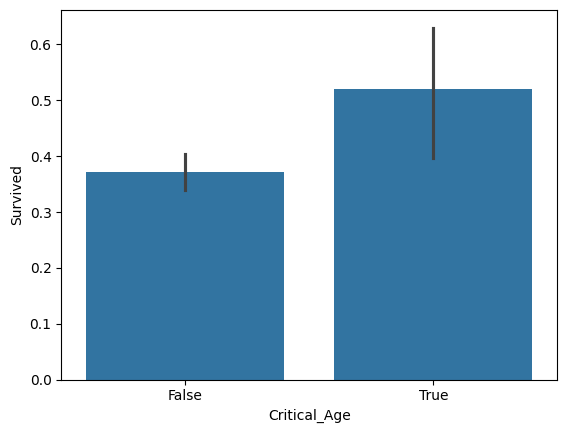

In [102]:
### Feature Engineering - Adding extra columns to enhance the analysis
tips = sns.load_dataset("tips")
sns.barplot(data=df_tit_cl, x="Critical_Age", y="Survived")

In [103]:
### Feature Engineering - Adding extra columns to enhance the analysis
df_tit_cl['Critical_Age'] = df_tit_cl['Critical_Age'].astype(int)

df_tit_cl.groupby('Critical_Age').describe()

PassengerId                                                     \
                   count        mean         std  min    25%    50%     75%   
Critical_Age                                                                  
0                  818.0  447.893643  255.738439  1.0  229.5  450.5  667.75   
1                   73.0  424.780822  275.787572  8.0  183.0  387.0  692.00   

                    Survived            ...     Fare           Age_Tr  \
                max    count      mean  ...      75%       max  count   
Critical_Age                            ...                             
0             891.0    818.0  0.371638  ...  30.0531  512.3292  818.0   
1             870.0     73.0  0.520548  ...  37.0042  151.5500   73.0   

                                                                             
                   mean        std    min   25%        50%   75%        max  
Critical_Age                                                                 
0             31.640652  11.401254  10.00  24.0  29.699118  36.0  80.000000  
1              7.943292   9.589048   0.42   2.0   4.000000   9.0  29.699118  

[2 rows x 64 columns]

In [104]:
### Encoding = what fields would be useful for predictions 
### select the fields 
## apply the encoding technique covered

df_tit_feat = df_tit_cl.copy()

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_tit_feat[['Age_SC','Fare_SC']] = scaler.fit_transform(df_tit_feat[['Age','Fare']])



In [105]:

df_tit_feat['Sex_En'] = df_tit_feat['Sex'].astype('category').cat.codes

features = ['Critical_Age', 'Pclass','Age_SC','Fare_SC','Sex_En','Survived']

df_tit_feat.describe()

df_tit_encoded = df_tit_feat[features].copy()

In [106]:
df_tit_encoded

,Critical_Age,Pclass,Age_SC,Fare_SC,Sex_En,Survived
0,0,3,0.271174,0.014151,1,0
1,0,1,0.472229,0.139136,0,1
2,0,3,0.321438,0.015469,0,1
3,0,1,0.434531,0.103644,0,1
4,0,3,0.434531,0.015713,1,0
...,...,...,...,...,...,...
886,0,2,0.334004,0.025374,1,0
887,0,1,0.233476,0.058556,0,1
888,0,3,0.392645,0.045771,0,0
889,0,1,0.321438,0.058556,1,1


In [107]:
df_tit_encoded.to_csv('Titatic_DF_ML.csv', index=False)